## Support Vector Classifier Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [42]:
X,y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 2, n_redundant=0)

In [44]:
X

array([[-2.91354792,  0.0081946 ],
       [-1.42463507,  0.05821436],
       [ 0.49822248, -1.58774728],
       ...,
       [ 2.23152291,  1.89720863],
       [-0.88734864,  0.50032157],
       [ 2.68737502,  2.41459686]])

In [46]:
y

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [48]:
pd.DataFrame(X)[0]

0     -2.913548
1     -1.424635
2      0.498222
3      1.964413
4     -0.721651
         ...   
995   -1.661407
996    0.862144
997    2.231523
998   -0.887349
999    2.687375
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

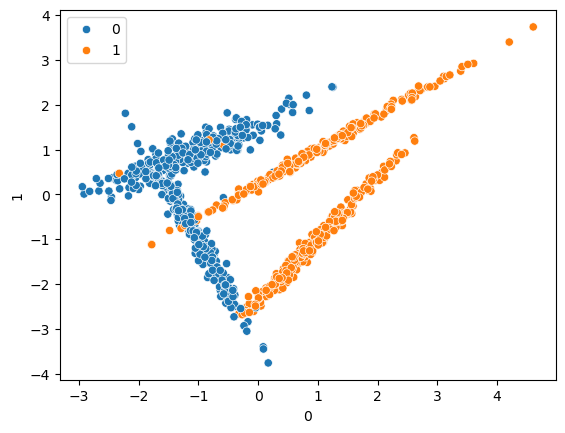

In [50]:
sns.scatterplot(x = pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [54]:
from sklearn.svm import SVC

In [56]:
svc = SVC(kernel = 'linear')

In [58]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [60]:
## Prediction
y_pred = svc.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       132
           1       0.93      0.90      0.91       118

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[124   8]
 [ 12 106]]


In [66]:
rbf = SVC(kernel = 'rbf')

In [68]:
rbf.fit(X_train,y_train)

SVC()

In [70]:
## Prediction
y_pred1 = rbf.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       132
           1       0.96      0.95      0.95       118

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[127   5]
 [  6 112]]


In [74]:
polynomial = SVC(kernel = 'poly')
polynomial.fit(X_train,y_train)
y_pred1 = polynomial.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       132
           1       0.93      0.97      0.95       118

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[124   8]
 [  4 114]]


## Hyperparameter tuning with SVC

In [76]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [82]:
grid = GridSearchCV(SVC(), param_grid = param_grid, refit=True, cv=5, verbose=3)

In [84]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [86]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [88]:
##prediction
y_pred4 = grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       132
           1       0.94      0.99      0.97       118

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[125   7]
 [  1 117]]
